In [1]:
import numpy as np
import pandas as pd
from cmdstanpy import CmdStanModel
from matplotlib import pyplot as plt

# Load and plot data

In [2]:
df = pd.read_csv("data/data-kubo11a.txt")
print(len(df))
df.head(5)

50


,Y
0,0
1,3
2,2
3,5
4,6


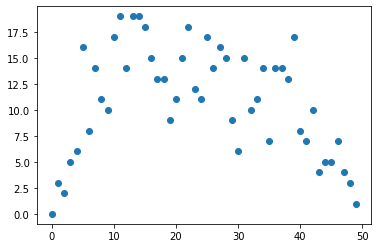

In [3]:
plt.plot(df["Y"], "o")

# Run Stan

In [4]:
data = {
    "I": len(df),
    "Y": df["Y"].values
}

In [5]:
model12_11 = CmdStanModel(stan_file="model/model12-11.stan")
print(model12_11)
fit12_11 = model12_11.sample(data=data)
summary12_11 = fit12_11.summary()
summary12_11[summary12_11["R_hat"] >= 1.1]

INFO:cmdstanpy:compiling stan program, exe file: /workdir/chap12/model/model12-11
INFO:cmdstanpy:compiler options: stanc_options=None, cpp_options=None
INFO:cmdstanpy:compiled model file: /workdir/chap12/model/model12-11
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 4


CmdStanModel: name=model12-11
	 stan_file=/workdir/chap12/model/model12-11.stan
	 exe_file=/workdir/chap12/model/model12-11
	 compiler_optons=stanc_options=None, cpp_options=None


INFO:cmdstanpy:finish chain 2
INFO:cmdstanpy:finish chain 3
INFO:cmdstanpy:finish chain 4
INFO:cmdstanpy:finish chain 1


,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,


In [6]:
model12_12 = CmdStanModel(stan_file="model/model12-12.stan")
print(model12_12)
fit12_12 = model12_12.sample(data=data)
summary12_12 = fit12_12.summary()
summary12_12[summary12_12["R_hat"] >= 1.1]

INFO:cmdstanpy:compiling stan program, exe file: /workdir/chap12/model/model12-12
INFO:cmdstanpy:compiler options: stanc_options=None, cpp_options=None
INFO:cmdstanpy:compiled model file: /workdir/chap12/model/model12-12
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 4


CmdStanModel: name=model12-12
	 stan_file=/workdir/chap12/model/model12-12.stan
	 exe_file=/workdir/chap12/model/model12-12
	 compiler_optons=stanc_options=None, cpp_options=None


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:finish chain 2
INFO:cmdstanpy:finish chain 3
INFO:cmdstanpy:finish chain 4


,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,


# Plot result

In [7]:
def plot_result(ax, y, samples):
    x = np.arange(len(y))
    percentiles = np.percentile(samples, [10.0, 25.0, 50.0, 75.0, 90.0], axis=0)
    ax.plot(x, y, "o", markeredgecolor='k', fillstyle="none")
    ax.plot(x, percentiles[2], "k-")
    ax.fill_between(x, percentiles[0], percentiles[4], color='k', alpha=0.1)
    ax.fill_between(x, percentiles[1], percentiles[3], color='k', alpha=0.3)
    ax.set_xlabel("i")
    ax.set_ylabel("Y[i]")
    ax.set_ylim(-0.5, 22.0)

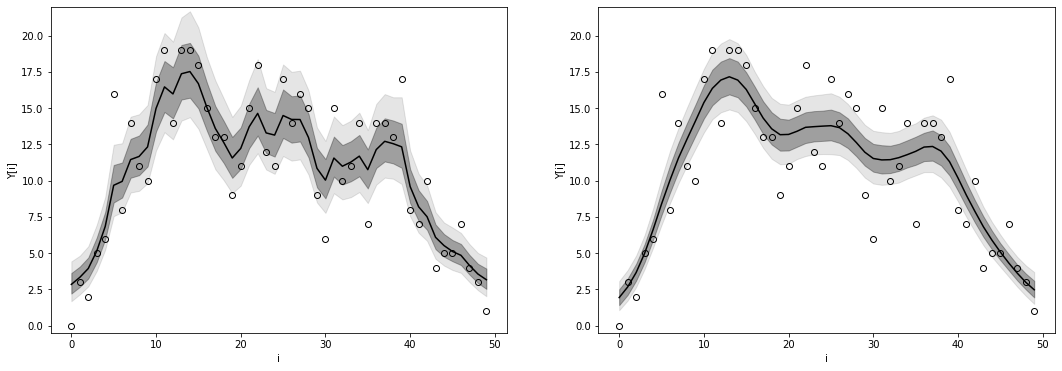

In [8]:
# Figure 12.7

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
plot_result(ax=axes[0], y=df["Y"].values, samples=fit12_11.stan_variable("Y_mean"))
plot_result(ax=axes[1], y=df["Y"].values, samples=fit12_12.stan_variable("Y_mean"))